#Classification Models with Iris Dataset

In [ ]:
#random forest classifier with iris dataset
#https://medium.com/edviconedu/random-forest-algorithm-to-classify-iris-flower-datasets-in-google-colab-b0652a8a8a66
from sklearn import datasets 
import pandas as pd
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() 
#dir(iris) 
#print(iris.target_names)
#print(iris.feature_names)

df = pd.DataFrame(iris.data, columns = iris.feature_names)
#shuffle the dataframe
#df = df.sample(frac=1).reset_index(drop=True)
df['species'] = iris.target


#80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species'],axis='columns'), iris.target, test_size = 0.2)

#random forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [ ]:
#logistic regression classifier with iris dataset
'''from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
model = LogisticRegression(random_state=0).fit(X, y)
model.score(X, y)'''


from sklearn import datasets 
import pandas as pd
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() 

df = pd.DataFrame(iris.data, columns = iris.feature_names)
#shuffle the dataframe
#df = df.sample(frac=1).reset_index(drop=True)
df['species'] = iris.target

#80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species'],axis='columns'), iris.target, test_size = 0.2)

#random forest model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9666666666666667

In [ ]:
#k nearest neighbors with iris dataset
#https://mbenes.me/stories/k-nearest-neighbors-algorithm-on-iris-dataset
from sklearn import datasets 
import pandas as pd
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() 

df = pd.DataFrame(iris.data, columns = iris.feature_names)
#shuffle the dataframe
#df = df.sample(frac=1).reset_index(drop=True)
df['species'] = iris.target

#80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species'],axis='columns'), iris.target, test_size = 0.2)

# create a knn (k=5) and fit
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

# Filtering Phenotype File

In [ ]:
#Filter by samples from blood AML (instead of just AML) bc some samples might not have expressional values
#Filter phenotype file to relevant samples

import pandas as pd
import numpy as np
 
#read in the AML samples file as dataframe and get all of the samples
blood_AML_TSp_df = pd.read_csv("/content/blood_AML_TSp.csv")
samples = blood_AML_TSp_df.columns

#read in the phenotype file by line
txt_file = open("/content/TcgaTargetGTEX_phenotype.txt", "r", encoding = "latin-1")
file_content = txt_file.read()
lines = file_content.split("\n")
txt_file.close()

#create a phenotype file that contains only the samples found in blood AML TSp
fp = open('/content/AML_samples_phenotype.txt', 'w')

for i in range(1, len(lines)):
  #get sample name in line
  if (lines[i].split("\t")[0]) in samples:
    print(lines[i])
    fp.write(lines[i] + '\n')

fp.close()

In [ ]:
#Filter out samples with sample_type as cell lines from phenotype file

#read in the phenotype file by line
txt_file = open("/content/TcgaTargetGTEX_phenotype.txt", "r", encoding = "latin-1")
file_content = txt_file.read()
lines = file_content.split("\n")
txt_file.close()

#write a new file without any cell line samples
fp = open('/content/phenotype_no_cell_line.txt', 'w')

for i in range(1, len(lines)):
  #get sample name in line
  if lines[i].split("\t")[4] != "Cell Line":
    print(lines[i])
    fp.write(lines[i] + '\n')

fp.close()

#find phenotypes of all samples with AML
AML_tissue_list = []
for i in range(1, len(lines)):
  if "Acute Myeloid Leukemia" in lines[i]:
    AML_tissue_list.append(lines[i].split("\t")[4])

print(set(AML_tissue_list))

Streaming output truncated to the last 5000 lines.
GTEX-X15G-1426-SM-4PQZK	Small Intestine - Terminal Ileum	Small Intestine - Terminal Ileum	Small Intestine	Normal Tissue	Female	GTEX
GTEX-ZF29-1626-SM-4WKFJ	Small Intestine - Terminal Ileum	Small Intestine - Terminal Ileum	Small Intestine	Normal Tissue	Female	GTEX
GTEX-WRHK-1026-SM-4MVOD	Small Intestine - Terminal Ileum	Small Intestine - Terminal Ileum	Small Intestine	Normal Tissue	Female	GTEX
GTEX-12WSK-1526-SM-5CVNO	Small Intestine - Terminal Ileum	Small Intestine - Terminal Ileum	Small Intestine	Normal Tissue	Female	GTEX
GTEX-Y3IK-1726-SM-4YCCR	Small Intestine - Terminal Ileum	Small Intestine - Terminal Ileum	Small Intestine	Normal Tissue	Female	GTEX
GTEX-11XUK-1426-SM-5EQMG	Small Intestine - Terminal Ileum	Small Intestine - Terminal Ileum	Small Intestine	Normal Tissue	Female	GTEX
GTEX-ZVT2-2126-SM-5NQ93	Small Intestine - Terminal Ileum	Small Intestine - Terminal Ileum	Small Intestine	Normal Tissue	Female	GTEX
GTEX-WEY5-1526-SM-4LMJF

# Finding Variable Transcripts in the AML TSp Transcript File
### Using coefficient of variation (std/mean) --> higher = more variability


#1. Convert all values in expression matrix to CPM and filter out transcripts with more than 80% of exp values equal to 0 (done in R)

# 2a. Phenotype distribution of samples

In [ ]:
#phenotype distribution of samples
#make a dictionary of all the samples in blood_AML_TSp --> corresponding values is the phenotype
import pandas as pd
import numpy as np
df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")
sample_phenotype_dict = {i : "phenotype" for i in list(df.columns)[1:]}
print(sample_phenotype_dict)
print(len(sample_phenotype_dict))


#read in the phenotype file by line
txt_file = open("/content/TcgaTargetGTEX_phenotype.txt", "r", encoding = "latin-1")
file_content = txt_file.read()
lines = file_content.split("\n")
txt_file.close()

#temp dictionary
sample_phenotype_dict_no_cell_line = {}

#replace all "phenotype" for all samples with actual phenotype
for sample in sample_phenotype_dict:
  matching_line = [i for i in lines if sample in i]
  #if it is not empty (meaning it has a corresponding phenotype in the file bc it is not cell line)
  if matching_line:
    sample_phenotype_dict_no_cell_line[sample] = matching_line[0].split("\t")[4]
print(sample_phenotype_dict_no_cell_line)

#get tissue type and how many times it appears
from collections import Counter
print(Counter(sample_phenotype_dict_no_cell_line.values()))

#reset sample_phenotype_dict
sample_phenotype_dict = sample_phenotype_dict_no_cell_line.copy()
print(len(sample_phenotype_dict))

{'GTEX-S4Q7-0003-SM-3NM8M': 'phenotype', 'GTEX-VJYA-0005-SM-3P5ZD': 'phenotype', 'GTEX-POMQ-0006-SM-5SI7D': 'phenotype', 'TCGA-AB-2921-03': 'phenotype', 'GTEX-1399Q-0005-SM-5NQAG': 'phenotype', 'GTEX-ZPCL-0004-SM-4WWD6': 'phenotype', 'GTEX-ZPIC-0005-SM-4WWEB': 'phenotype', 'GTEX-TMZS-0001-SM-3P61Q': 'phenotype', 'GTEX-WHSB-0005-SM-3LK7C': 'phenotype', 'GTEX-POYW-0006-SM-2XCF4': 'phenotype', 'GTEX-RU1J-0006-SM-2TF6M': 'phenotype', 'GTEX-XMD2-0006-SM-4WWEG': 'phenotype', 'GTEX-YBZK-0005-SM-59HKG': 'phenotype', 'GTEX-S32W-0004-SM-2XCE9': 'phenotype', 'TCGA-AB-2837-03': 'phenotype', 'TCGA-AB-2914-03': 'phenotype', 'GTEX-Q2AG-0005-SM-5SI7F': 'phenotype', 'TCGA-AB-2967-03': 'phenotype', 'GTEX-132AR-0006-SM-5NQ7N': 'phenotype', 'GTEX-13OVK-0006-SM-5O9B7': 'phenotype', 'GTEX-X4LF-0006-SM-3NMCO': 'phenotype', 'GTEX-XGQ4-0004-SM-4AT5S': 'phenotype', 'GTEX-OXRL-0005-SM-3LK6A': 'phenotype', 'TCGA-AB-2892-03': 'phenotype', 'TCGA-AB-2976-03': 'phenotype', 'GTEX-1497J-0005-SM-5NQBD': 'phenotype', 'TC

#2. PCA and visualization


Explained variation per principal component: [0.62966426 0.08367078]
Cumulative variance explained by 2 principal components: 71.33%


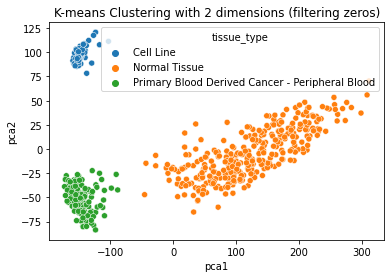

In [ ]:
#pca (2) and visualization of original matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")
transcript_col = df["transcript"]
#transcript_names = df.transcript.unique()

#since AML_exp_cpm_zerofilter still has some of the samples with cell line phenotype, need to get rid of them
df = df[[c for c in df.columns if c in sample_phenotype_dict.keys()]]
#add back the transcript column bc it went missing for some reason
df.insert(0, "transcript", transcript_col)

#tranpose dataframe and fill NaN values with 0
df = df.transpose()
#rearranging the column names
df.columns = df.iloc[0]
df = df.iloc[1: , :]

df = df.fillna(0)

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

results = pd.DataFrame(pca_2_result,columns=['pca1','pca2'])
#add column with tissue type (cancer or normal)
results['tissue_type'] = list(sample_phenotype_dict.values())
sns.scatterplot(data=results, x="pca1", y="pca2", hue="tissue_type")
plt.title('K-means Clustering with 2 dimensions (filtering zeros)')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Explained variation per principal component: [0.61562451 0.08763085]
Cumulative variance explained by 2 principal components: 70.33%


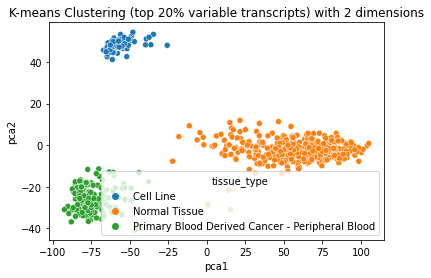

In [ ]:
#pca (2) and visualization of matrix with top 20% variable transcripts
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")
transcript_col = df["transcript"]
#transcript_names = df.transcript.unique()

#make mean, standard deviation columns, and cv columns
df['mean'] = df.mean(axis=1)
df['standard_deviation'] = df.std(axis=1)
df['coefficient_of_variation'] = df['standard_deviation']/df['mean']

#no filtering -- 10: 4175, 15: 6263, 20: 8351, 30: 12526
#zero filtering -- 10: 625, 15: 937, 20: 1249, 30: 1874
#find the most variable transcripts (top X% cv values) and remake df
df = df.nlargest(1249, 'coefficient_of_variation')
#get rid of mean, std, and cv columns
df = df.iloc[: , :-3]


#since AML_exp_cpm_zerofilter still has some of the samples with cell line phenotype, need to get rid of them
df = df[[c for c in df.columns if c in sample_phenotype_dict.keys()]]
#add back the transcript column bc it went missing for some reason
df.insert(0, "transcript", transcript_col)

#tranpose dataframe and fill NaN values with 0
df = df.transpose()
#rearranging the column names
df.columns = df.iloc[0]
df = df.iloc[1: , :]

df = df.fillna(0)


pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

results = pd.DataFrame(pca_2_result,columns=['pca1','pca2'])
#add column with tissue type (cancer or normal)
results['tissue_type'] = list(sample_phenotype_dict.values())
sns.scatterplot(data=results, x="pca1", y="pca2", hue="tissue_type")
plt.title('K-means Clustering (top 20% variable transcripts) with 2 dimensions')
plt.show()

# 3D Plots

Explained variation per principal component: [0.62966426 0.08367078 0.04951361]
Cumulative variance explained by 3 principal components: 76.28%


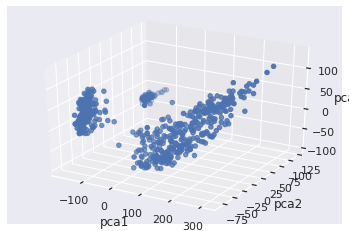

In [ ]:
#3d plot for PCA of 3 components
#https://medium.com/@sk.shravan00/k-means-for-3-variables-260d20849730
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#tranpose dataframe and fill NaN values with 0
df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")
df = df.transpose()
df.columns = df.iloc[0]
df = df.iloc[1: , :]
#df = df.reset_index(drop=True)
df = df.fillna(0)

pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df)
print('Explained variation per principal component: {}'.format(pca_3.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca_3.explained_variance_ratio_)))

results = pd.DataFrame(pca_3_result,columns=['pca1','pca2','pca3'])

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = results['pca1']
y = results['pca2']
z = results['pca3']
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
ax.scatter(x, y, z)
plt.show()

#sns.scatterplot(x="pca1", y="pca2", hue=df['cluster'], data=results)
#sns.scatterplot(data=results, x="pca1", y="pca2")
#plt.title('K-means Clustering with 2 dimensions')
#plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


Explained variation per principal component: [0.61562451 0.08763085 0.02894951]
Cumulative variance explained by 3 principal components: 73.22%


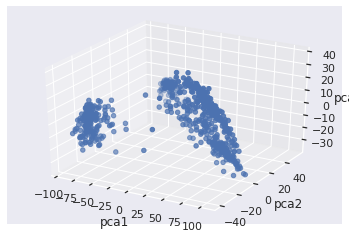

In [ ]:
#3d plot for clusters of top 10% variable transcripts
#pca (2) and visualization of matrix with top 10% variable transcripts
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")

#make mean, standard deviation columns, and cv columns
df['mean'] = df.mean(axis=1)
df['standard_deviation'] = df.std(axis=1)
df['coefficient_of_variation'] = df['standard_deviation']/df['mean']

#10: 4175, 15: 6263, 20: 8351, 30: 12526
#find the most variable transcripts (top X% cv values) and remake df
df = df.nlargest(1249, 'coefficient_of_variation')
variable_transcripts = df.transcript.unique()
#get rid of mean, std, and cv columns
df = df.iloc[: , :-3]

#tranpose dataframe and fill NaN values with 0
df = df.transpose()
df.columns = df.iloc[0]
df = df.iloc[1: , :]
#df = df.reset_index(drop=True)
df = df.fillna(0)

pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df)
print('Explained variation per principal component: {}'.format(pca_3.explained_variance_ratio_))
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca_3.explained_variance_ratio_)))

results = pd.DataFrame(pca_3_result,columns=['pca1','pca2','pca3'])

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = results['pca1']
y = results['pca2']
z = results['pca3']
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
ax.scatter(x, y, z)
plt.show()

#3. Clustering of AML TSp Expression Data

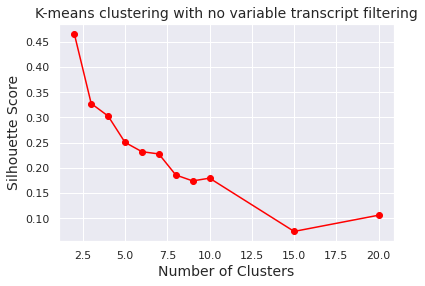

In [ ]:
#without doing any filtering or following tutorial pallavi gave
#https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240

#first, transpose the dataset so that samples are rows instead of columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 
df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")
transcript_col = df["transcript"]
#transcript_names = df.transcript.unique()

#since AML_exp_cpm_zerofilter still has some of the samples with cell line phenotype, need to get rid of them
df = df[[c for c in df.columns if c in sample_phenotype_dict.keys()]]
#add back the transcript column bc it went missing for some reason
df.insert(0, "transcript", transcript_col)

#tranpose dataframe and fill NaN values with 0
df = df.transpose()
#rearranging the column names
df.columns = df.iloc[0]
df = df.iloc[1: , :]

df = df.fillna(0)

#kmeans = KMeans(n_clusters=5, random_state=42).fit(df)
#kmeans.fit(df)

#Use silhouette score to find best number of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,15,20]
silhouette_score_list = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(df)
    centers = kmeans.cluster_centers_

    score = silhouette_score(df, preds)
    silhouette_score_list.append(score)
    #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
   
#graph to visualize the results  
plt.plot(range_n_clusters, silhouette_score_list, color='red', marker='o')
plt.title('K-means clustering with no variable transcript filtering', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


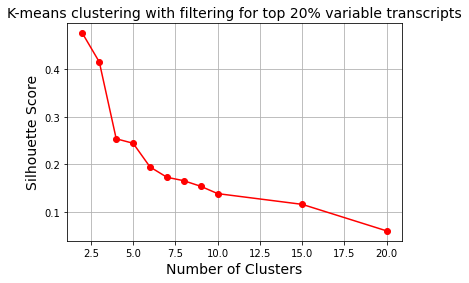

In [ ]:
#elbow method for top X% variable transcripts
#X can be 10, 15, 20, 30

#filtering for top X% variable transcripts (highest CV)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 
#read in the file and add rename the column
df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")
transcript_col = df["transcript"]
#transcript_names = df.transcript.unique()

#make mean, standard deviation columns, and cv columns
df['mean'] = df.mean(axis=1)
df['standard_deviation'] = df.std(axis=1)
df['coefficient_of_variation'] = df['standard_deviation']/df['mean']

#for no zero filtering -- 10: 4175, 15: 6263, 20: 8351, 30: 12526
#zero filtering -- 10: 625, 15: 937, 20: 1249, 30: 1874
#find the most variable transcripts (top X% cv values) and remake df
df = df.nlargest(1249, 'coefficient_of_variation')
variable_transcripts = df.transcript.unique()
#get rid of mean, std, and cv columns
df = df.iloc[: , :-3]

#since AML_exp_cpm_zerofilter still has some of the samples with cell line phenotype, need to get rid of them
df = df[[c for c in df.columns if c in sample_phenotype_dict.keys()]]
#add back the transcript column bc it went missing for some reason
df.insert(0, "transcript", transcript_col)

#transpose df  and fill NaN values with 0
df = df.transpose()
#rearranging the column names
df.columns = df.iloc[0]
df = df.iloc[1: , :]
#df = df.reset_index(drop=True)
df = df.fillna(0)


#Use silhouette score to find best number of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,15,20]
silhouette_score_list = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(df)
    centers = kmeans.cluster_centers_

    score = silhouette_score(df, preds)
    silhouette_score_list.append(score)
    #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
   

#graph to visualize the results  
plt.plot(range_n_clusters, silhouette_score_list, color='red', marker='o')
plt.title('K-means clustering with filtering for top 20% variable transcripts', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#make 3 clusters for dataset with samples with cell line phenotype

k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(df)

#add extra column indicating the cluster number for each sample
df['cluster'] = y 
cluster1 = df[df.cluster==0] 
#TCGA-AB-2938-03 (cancer), GTEX-WI4N-0005-SM-3LK7E (normal), TCGA-AB-2941-03 (cancer) (cluster1)
cluster2 = df[df.cluster==1] 
cluster3 = df[df.cluster==2] 


#get accuracy of the clusters
#checking accuracy of the clusters if cell line phenotype is included

#cluster 1 is Normal Tissue
cluster1_transcripts = cluster1.index
#cluster 2 is Primary Blood Derived Cancer - Peripheral Blood
cluster2_transcripts = cluster2.index
#cluster 3 is Cell Line
cluster3_transcripts = cluster3.index


misclassified_samples = []
for item in cluster1_transcripts:
  if sample_phenotype_dict[item] != "Normal Tissue":
    misclassified_samples.append(item)

print(misclassified_samples)

for item in cluster2_transcripts:
  if sample_phenotype_dict[item] != "Primary Blood Derived Cancer - Peripheral Blood":
    misclassified_samples.append(item)

print(misclassified_samples)

for item in cluster3_transcripts:
  if sample_phenotype_dict[item] != "Cell Line":
    misclassified_samples.append(item)

print(misclassified_samples)


print(len(cluster1_transcripts))
print(len(cluster2_transcripts))
print(len(cluster3_transcripts))

[]
['GTEX-QXCU-0006-SM-2TC5K']
['GTEX-QXCU-0006-SM-2TC5K', 'GTEX-11NV4-0005-SM-5N9EX', 'GTEX-Z93S-0005-SM-4RGLW']
334
174
109


In [ ]:
#DON'T RUN THIS FOR NOW BC IT'S ONLY FOR 2 CLUSTERS

#make two clusters and see which samples are in which cluster
#MAKE SURE TO RESET VARIABLE_TRANSCRIPTDF SO THAT IT IS THE TOP 10% VARIABLE TRANSCRIPTS

k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(df)

#add extra column indicating the cluster number for each sample
df_with_cluster = df.copy()
df_with_cluster['cluster'] = y 
cluster1 = df_with_cluster[df_with_cluster.cluster==0] 
#TCGA-AB-2938-03 (cancer), GTEX-WI4N-0005-SM-3LK7E (normal), TCGA-AB-2941-03 (cancer) (cluster1)
cluster2 = df_with_cluster[df_with_cluster.cluster==1] 

In [ ]:
#DON'T RUN THIS FOR NOW BC IT'S ONLY FOR 2 CLUSTERS

#get accuracy of the clusters

#cluster 1 is normal
cluster1_transcripts = cluster1.index
#cluster 2 is cancerous
cluster2_transcripts = cluster2.index

print(cluster1_transcripts)
print(len(cluster1_transcripts))

misclassified_samples = []
for item in cluster1_transcripts:
  print(sample_phenotype_dict[item])
  if sample_phenotype_dict[item] != "Normal Tissue":
    misclassified_samples.append(item)

print(misclassified_samples)

for item in cluster2_transcripts:
  print(sample_phenotype_dict[item])
  if sample_phenotype_dict[item] != "Primary Blood Derived Cancer - Peripheral Blood":
    misclassified_samples.append(item)

print(misclassified_samples)

#both of the misclassifed samples were classifed as cancer but were actually normal
print(sample_phenotype_dict['GTEX-11NV4-0005-SM-5N9EX'])
print(sample_phenotype_dict['GTEX-QXCU-0006-SM-2TC5K'])

print(len(cluster1_transcripts))
print(len(cluster2_transcripts))

# 3a. Hierarchical Clustering

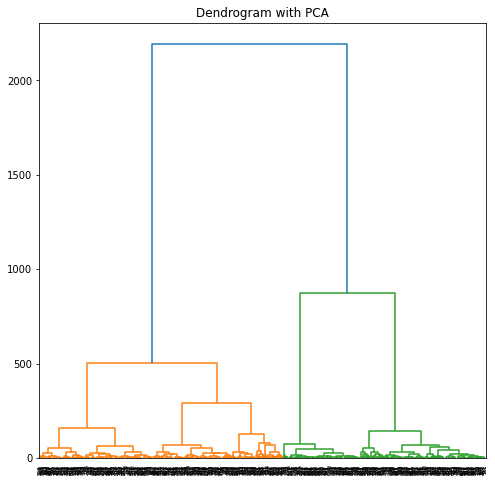

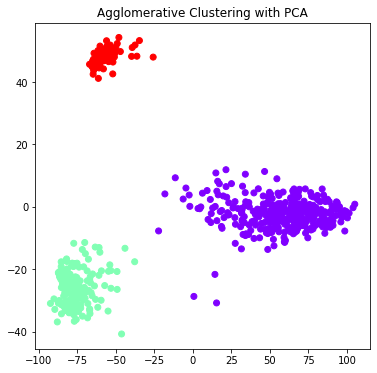

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import plotly.figure_factory as ff

#dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
#model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
#model.fit(df)
#labels = model.labels_

#clustering = AgglomerativeClustering(n_clusters=2).fit_predict(df)

#PCA
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df)
results = pd.DataFrame(pca_2_result,columns=['pca1','pca2'])

#dendrogram
plt.figure(figsize =(8, 8))
plt.title('Dendrogram with PCA')
Dendrogram = sch.dendrogram((sch.linkage(results, method ='ward')))

#agglomerative clustering
ac2 = AgglomerativeClustering(n_clusters = 3)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.title('Agglomerative Clustering with PCA')
plt.scatter(results['pca1'], results['pca2'],
           c = ac2.fit_predict(results), cmap ='rainbow')
plt.show()

# 4. Random Forest Classification
clustering results --> remove anomalous samples --> apply RF feature selection --> robust classification model

In [ ]:
#random forest classifier with dataset (including cell lines)
from sklearn import datasets 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#remove anomalous samples
#didn't classify ['GTEX-QXCU-0006-SM-2TC5K', 'GTEX-11NV4-0005-SM-5N9EX', 'GTEX-Z93S-0005-SM-4RGLW'] correctly
df_remove = df.copy()
for i in df.index:
  if i in misclassified_samples:
    df_remove = df_remove.drop(i, axis=0)

#training and testing split
X_train, X_test, y_train, y_test = train_test_split(df_remove.drop(['cluster'],axis='columns'), df_remove.cluster, test_size = 0.2)

#make, fit, and score the model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

128
('ENST00000463988.1', 0.0)
('ENST00000528073.5', 0.0)
('ENST00000481152.1', 0.0)
('ENST00000469091.1', 0.0)
('ENST00000567014.1', 0.0)
('ENST00000482737.1', 0.0)
('ENST00000477675.1', 0.0)
('ENST00000274711.6', 0.0)
('ENST00000375561.9', 0.0)
('ENST00000337231.5', 0.0)
('ENST00000301242.8', 0.0)
('ENST00000454061.5', 0.0)
('ENST00000482151.1', 0.0)
('ENST00000587993.5', 0.0)
('ENST00000510079.2', 0.0)
('ENST00000583927.1', 0.0)
('ENST00000553766.1', 0.0)
('ENST00000531924.1', 0.0)
('ENST00000373161.5', 0.0)
('ENST00000530115.1', 0.0)
('ENST00000430983.5', 0.0)
('ENST00000574840.1', 0.0)
('ENST00000498810.1', 0.035535923708548994)
('ENST00000614660.1', 0.0)
('ENST00000300961.10', 0.0)
('ENST00000495494.5', 0.0)
('ENST00000478010.1', 0.0)
('ENST00000412181.1', 0.03612476621638795)
('ENST00000338306.7', 0.0)
('ENST00000510701.1', 0.0)
('ENST00000415292.1', 0.0)
('ENST00000517411.1', 0.0)
('ENST00000317749.9', 0.0)
('ENST00000441289.1', 0.0)
('ENST00000472381.5', 0.0)
('ENST00000280772

1.0

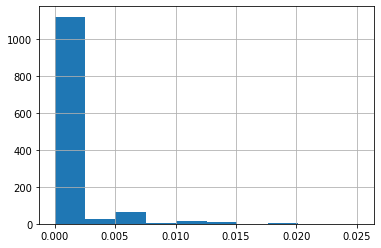

In [ ]:
#feature selection
from sklearn.feature_selection import SelectFromModel

#see which features are important
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_features= X_train.columns[(sel.get_support())]
print(len(selected_features))

#plot the distribution of importance with histrogram
#histogram of feature importance scores
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

#-----------------------------------------------
#https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/

#print the name and gini importance of each feature
for feature in zip(df_remove.columns, model.feature_importances_):
    print(feature)

#selector object uses RF to identify features w/ importance of more than 0.0003
sfm = SelectFromModel(model, threshold=0.0003)

#train the selector
sfm.fit(X_train, y_train)

selected_features = []

#print the names of the most important features
#26 were selected
transcript_names = list(df_remove.columns)[:-1]
for feature_list_index in sfm.get_support(indices=True):
    print(transcript_names[feature_list_index])
    selected_features.append(transcript_names[feature_list_index])

#subset dataset to be only most important features (transcripts)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

#create a new RF classifier for most important features
model_important = RandomForestClassifier(n_estimators=100)

#train new classifier on new dataset with most important features
model_important.fit(X_important_train, y_train)
model_important.score(X_important_test, y_test)

# Random

In [ ]:
# splitting phenotype into cancerous and normal

#read in the phenotype file by line
txt_file = open("/content/TcgaTargetGTEX_phenotype.txt", "r", encoding = "latin-1")
file_content = txt_file.read()
lines = file_content.split("\n")
txt_file.close()

fp_normal = open('/content/phenotype_normal.txt', 'w')
fp_cancer = open('/content/phenotype_cancer.txt', 'w')

for i in range(1,len(lines)):
  if "Normal" in lines[i]:
    fp_normal.write(lines[i] + '\n')
    print(lines[i])
  else:
    fp_cancer.write(lines[i] + '\n')
  
fp_normal.close()
fp_cancer.close() 

In [ ]:
#tissue distribution of top 20% variable transcripts across tissues
#tissue distribution of feature selected transcripts across tissues

#get the top 20% variable transcripts and put them in a list
import pandas as pd
import numpy as np

df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")
transcript_col = df["transcript"]
#transcript_names = df.transcript.unique()

#make mean, standard deviation columns, and cv columns
df['mean'] = df.mean(axis=1)
df['standard_deviation'] = df.std(axis=1)
df['coefficient_of_variation'] = df['standard_deviation']/df['mean']

#zero filtering -- 10: 625, 15: 937, 20: 1249, 30: 1874
#find the most variable transcripts (top X% cv values) and remake df
df = df.nlargest(1249, 'coefficient_of_variation')
top_var_transcripts = df.transcript.unique()
print(top_var_transcripts)

#--------------------------------------------------------------------------------------------------
#find corresponding tissue for each transcript
#load in data with all tissue specific transcripts and their tissues
df = pd.read_csv("/content/TSp_transcripts_list_PS.csv")

#make a dictionary showing which tissue each tissue specific transcript belongs to
correspondingtissues = {}

#find out which tissue each tst is in and append it to correspondingtissues
for item in selected_features:
  try:
    correspondingtissues[item] = df.loc[df['transcript'] == item,'Tc_tissue_comb'].iloc[0]
  except: 
    correspondingtissues[item] = 'Unmatched'

print(correspondingtissues)

#get number of tsp transcripts for all tissues
import csv
numoftranscripts = []
tissuetypes = list(set(list(correspondingtissues.values())))

for tissue in tissuetypes:
  numoftranscripts.append(len([k for k,v in correspondingtissues.items() if v == tissue]))

print(numoftranscripts)

with open('/content/numoftranscripts.csv', mode='w') as idk_file:
    writer = csv.writer(idk_file)
    writer.writerow(["Tissue", "Number of Feature Selected Transcripts"])

    count = 0
    for item in tissuetypes:
      writer.writerow([item, numoftranscripts[count]])
      count += 1

    writer.writerow(["Total", str(len(selected_features))])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


['ENST00000463988.1' 'ENST00000528073.5' 'ENST00000481152.1' ...
 'ENST00000339497.7' 'ENST00000361470.3' 'ENST00000318787.13']
{'ENST00000498810.1': 'lung', 'ENST00000491428.1': 'skin', 'ENST00000562242.1': 'brain', 'ENST00000624336.1': 'brain', 'ENST00000448484.5': 'brain', 'ENST00000514253.2': 'ovary', 'ENST00000600825.1': 'blood', 'ENST00000459950.1': 'brain', 'ENST00000367592.5': 'adrenal', 'ENST00000432089.1': 'blood', 'ENST00000464603.1': 'brain', 'ENST00000482776.1': 'lung', 'ENST00000577781.1': 'testis', 'ENST00000392645.6': 'brain', 'ENST00000256196.8': 'skin', 'ENST00000561542.1': 'brain', 'ENST00000589203.5': 'brain', 'ENST00000579618.1': 'skin', 'ENST00000473145.5': 'testis', 'ENST00000607513.1': 'thyroid', 'ENST00000356178.8': 'brain', 'ENST00000481918.1': 'skin', 'ENST00000418386.2': 'blood', 'ENST00000395131.5': 'brain', 'ENST00000522208.6': 'brain', 'ENST00000600262.1': 'blood'}
[2, 11, 4, 1, 1, 2, 1, 4]


In [ ]:

print(len(tissuetypes))

25


# Subtyping Cancer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


Explained variation per principal component: [0.08707721 0.0612703 ]
Cumulative variance explained by 2 principal components: 14.83%


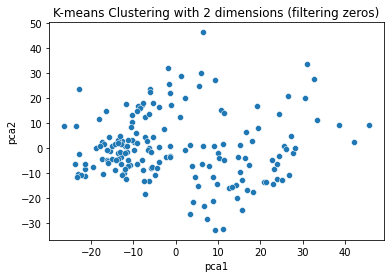

In [ ]:
#visualization of only AML samples with top 20% variable transcripts

AML_samples = []
for sample in sample_phenotype_dict:
  if sample_phenotype_dict[sample] == 'Primary Blood Derived Cancer - Peripheral Blood':
    AML_samples.append(sample)

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv("/content/AML_exp_cpm_zerofilter.csv")
#since AML_exp_cpm_zerofilter still has some of the samples with cell line phenotype, need to get rid of them
df = df[[c for c in df.columns if c in sample_phenotype_dict.keys()]]
#add back the transcript column bc it went missing for some reason
df.insert(0, "transcript", transcript_col)

#'''
#make mean, standard deviation columns, and cv columns
df['mean'] = df.mean(axis=1)
df['standard_deviation'] = df.std(axis=1)
df['coefficient_of_variation'] = df['standard_deviation']/df['mean']

#zero filtering -- 10: 625, 15: 937, 20: 1249, 30: 1874
#find the most variable transcripts (top X% cv values) and remake df
df = df.nlargest(1249, 'coefficient_of_variation')
#get rid of mean, std, and cv columns
df = df.iloc[: , :-3]
#'''

#tranpose dataframe and fill NaN values with 0
df = df.transpose()
#rearranging the column names
df.columns = df.iloc[0]
df = df.iloc[1: , :]

df = df.fillna(0)
df = df.loc[AML_samples]

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

results = pd.DataFrame(pca_2_result,columns=['pca1','pca2'])
#add column with tissue type (cancer or normal)
sns.scatterplot(data=results, x="pca1", y="pca2")
plt.title('K-means Clustering with 2 dimensions (filtering zeros)')
plt.show()

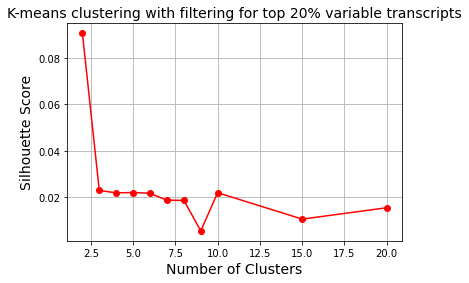

In [ ]:
#clustering AML to find subtpes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Use silhouette score to find best number of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,15,20]
silhouette_score_list = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(df)
    centers = kmeans.cluster_centers_

    score = silhouette_score(df, preds)
    silhouette_score_list.append(score)
    #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
   

#graph to visualize the results  
plt.plot(range_n_clusters, silhouette_score_list, color='red', marker='o')
plt.title('K-means clustering with filtering for top 20% variable transcripts', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid(True)
plt.show()

# Survival Analysis


In [ ]:
import pandas as pd
import numpy as np
 
#read in survival analysis
survival_df = pd.read_csv("/content/TCGA-LAML.survival.tsv", sep='\t')

#get all of the samples ending with A bc there are repeats
samples_with_A = []
for sample in survival_df['sample']:
  if sample[-1] == 'A':
    samples_with_A.append(sample)

#rename them so they can be matched in the phenotype file
survival_df = survival_df[survival_df['sample'].str.endswith('A')]
survival_df['sample'] = survival_df['sample'].str[:-1]
survival_df


#unq_surv_df = survival_df[survival_df['sample'].str.contains('Ju')]

survival_df['phenotype'] = survival_df['sample'].map(sample_phenotype_dict)
survival_df = survival_df.dropna()
survival_df
#list(survival_df['sample'])

,sample,OS,_PATIENT,OS.time,phenotype
1,TCGA-AB-2934-03,0,TCGA-AB-2934,28,Primary Blood Derived Cancer - Peripheral Blood
9,TCGA-AB-2840-03,1,TCGA-AB-2840,28,Primary Blood Derived Cancer - Peripheral Blood
14,TCGA-AB-2824-03,1,TCGA-AB-2824,30,Primary Blood Derived Cancer - Peripheral Blood
19,TCGA-AB-2988-03,1,TCGA-AB-2988,30,Primary Blood Derived Cancer - Peripheral Blood
22,TCGA-AB-2972-03,1,TCGA-AB-2972,30,Primary Blood Derived Cancer - Peripheral Blood
...,...,...,...,...,...
592,TCGA-AB-3005-03,0,TCGA-AB-3005,2100,Primary Blood Derived Cancer - Peripheral Blood
596,TCGA-AB-2849-03,0,TCGA-AB-2849,2220,Primary Blood Derived Cancer - Peripheral Blood
602,TCGA-AB-2828-03,0,TCGA-AB-2828,2284,Primary Blood Derived Cancer - Peripheral Blood
608,TCGA-AB-2819-03,0,TCGA-AB-2819,2496,Primary Blood Derived Cancer - Peripheral Blood


# Analysis of Feature Selected Transcripts

In [ ]:
print(selected_features)
import pandas as pd
import numpy as np
 
# reading csv file
df = pd.read_csv("/content/CSIRE_data_all_tissues.csv", delimiter=";")
# replace commas with decimal
for i in range(6,len(df.columns)):
  df[df.columns[i]] = df[df.columns[i]].str.replace(',', '.').astype(float)

#find matching genes
selected_genes = []
for transcript in selected_features:
  try:
    selected_genes.append(df.loc[df.ensembl_transcript_id_version == transcript, 'ensembl_gene_id'].values[0])
  except:
    selected_genes.append(transcript + " not found")

for gene in selected_genes:
  if selected_genes.count(gene) > 1:
    print("appears multiple times: " + gene)
  else:
    print("appears once: " + gene)

#not found: ENST00000256196.8 (RRAS2 = )

#tumor suppressor: ATXN2, OncoKB (sources), TSG (role in cancer)
#oncogenes: NKTR, IntOGene, oncogene

['ENST00000498810.1', 'ENST00000491428.1', 'ENST00000562242.1', 'ENST00000624336.1', 'ENST00000448484.5', 'ENST00000514253.2', 'ENST00000600825.1', 'ENST00000459950.1', 'ENST00000367592.5', 'ENST00000432089.1', 'ENST00000464603.1', 'ENST00000482776.1', 'ENST00000577781.1', 'ENST00000392645.6', 'ENST00000256196.8', 'ENST00000561542.1', 'ENST00000589203.5', 'ENST00000579618.1', 'ENST00000473145.5', 'ENST00000607513.1', 'ENST00000356178.8', 'ENST00000481918.1', 'ENST00000418386.2', 'ENST00000395131.5', 'ENST00000522208.6', 'ENST00000600262.1']
appears once: ENSG00000008128
appears once: ENSG00000067533
appears once: ENSG00000261451
appears once: ENSG00000279792
appears once: ENSG00000064787
appears once: ENSG00000152348
appears once: ENSG00000142347
appears once: ENSG00000114857
appears once: ENSG00000034693
appears once: ENSG00000102030
appears once: ENSG00000168393
appears once: ENSG00000146731
appears once: ENSG00000263826
appears once: ENSG00000204842
appears once: ENST00000256196.8 n

In [ ]:
for item in selected_genes:
  print(item)

ENSG00000008128
ENSG00000067533
ENSG00000261451
ENSG00000279792
ENSG00000064787
ENSG00000152348
ENSG00000142347
ENSG00000114857
ENSG00000034693
ENSG00000102030
ENSG00000168393
ENSG00000146731
ENSG00000263826
ENSG00000204842
ENST00000256196.8 not found
ENSG00000259994
ENSG00000175322
ENSG00000167088
ENSG00000010318
ENST00000607513.1 not found
ENSG00000189164
ENSG00000174606
ENST00000418386.2 not found
ENSG00000204220
ENSG00000113269
ENSG00000133246
